In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/amostra_por_classificador.csv')

X = df.drop('WQI', axis=1)

y = df['WQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)

model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

Accuracy: 0.3446327683615819
Confusion Matrix:
 [[ 0  1 49  0]
 [ 0  2 45  2]
 [ 0  1 36  1]
 [ 0  0 17 23]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.50      0.04      0.08        49
           3       0.24      0.95      0.39        38
           4       0.88      0.57      0.70        40

    accuracy                           0.34       177
   macro avg       0.41      0.39      0.29       177
weighted avg       0.39      0.34      0.26       177


ROC


c:\Users\Hugo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hugo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hugo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


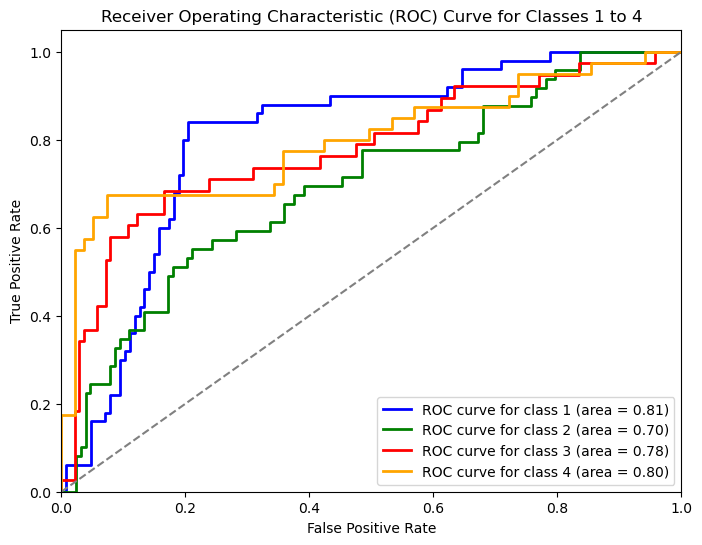

In [4]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# # ROC
print('\nROC')
# Binarizando os rótulos para a abordagem one-vs-rest
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Calculando ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Classes 1 to 4')
plt.legend(loc="lower right")
plt.show()